In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

%matplotlib inline

In [3]:
wheat_data = pd.read_csv("wheat.csv")
print(wheat_data)

      area  perimeter  compactness  length  width  asymmetry coefficient  \
0    15.26      14.84       0.8710   5.763  3.312                  2.221   
1    14.88      14.57       0.8811   5.554  3.333                  1.018   
2    14.29      14.09       0.9050   5.291  3.337                  2.699   
3    13.84      13.94       0.8955   5.324  3.379                  2.259   
4    16.14      14.99       0.9034   5.658  3.562                  1.355   
..     ...        ...          ...     ...    ...                    ...   
205  12.19      13.20       0.8783   5.137  2.981                  3.631   
206  11.23      12.88       0.8511   5.140  2.795                  4.325   
207  13.20      13.66       0.8883   5.236  3.232                  8.315   
208  11.84      13.21       0.8521   5.175  2.836                  3.598   
209  12.30      13.34       0.8684   5.243  2.974                  5.637   

     groove length  category  
0            5.220       1.0  
1            4.956       

In [4]:
wheat_data = wheat_data.drop('category', axis=1)
print(wheat_data)

      area  perimeter  compactness  length  width  asymmetry coefficient  \
0    15.26      14.84       0.8710   5.763  3.312                  2.221   
1    14.88      14.57       0.8811   5.554  3.333                  1.018   
2    14.29      14.09       0.9050   5.291  3.337                  2.699   
3    13.84      13.94       0.8955   5.324  3.379                  2.259   
4    16.14      14.99       0.9034   5.658  3.562                  1.355   
..     ...        ...          ...     ...    ...                    ...   
205  12.19      13.20       0.8783   5.137  2.981                  3.631   
206  11.23      12.88       0.8511   5.140  2.795                  4.325   
207  13.20      13.66       0.8883   5.236  3.232                  8.315   
208  11.84      13.21       0.8521   5.175  2.836                  3.598   
209  12.30      13.34       0.8684   5.243  2.974                  5.637   

     groove length  
0            5.220  
1            4.956  
2            4.825  
3  

Из датасета выберите наиболее важные параметры, характеризующие цель исследования и сформируйте из них матрицу X.

In [5]:
X = wheat_data[['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry coefficient', 'groove length']]
print(X)

      area  perimeter  compactness  length  width  asymmetry coefficient  \
0    15.26      14.84       0.8710   5.763  3.312                  2.221   
1    14.88      14.57       0.8811   5.554  3.333                  1.018   
2    14.29      14.09       0.9050   5.291  3.337                  2.699   
3    13.84      13.94       0.8955   5.324  3.379                  2.259   
4    16.14      14.99       0.9034   5.658  3.562                  1.355   
..     ...        ...          ...     ...    ...                    ...   
205  12.19      13.20       0.8783   5.137  2.981                  3.631   
206  11.23      12.88       0.8511   5.140  2.795                  4.325   
207  13.20      13.66       0.8883   5.236  3.232                  8.315   
208  11.84      13.21       0.8521   5.175  2.836                  3.598   
209  12.30      13.34       0.8684   5.243  2.974                  5.637   

     groove length  
0            5.220  
1            4.956  
2            4.825  
3  

Проверьте Х на пропуски и закодируйте категориальные данные, если это необходимо.

In [6]:
missing_values = X.isnull().sum()
print("Пропуски в данных:")
print(missing_values)

Пропуски в данных:
area                     0
perimeter                0
compactness              0
length                   0
width                    0
asymmetry coefficient    0
groove length            0
dtype: int64


Нормализуйте значения в матрице Х функцией MinMaxScaler()

In [7]:
scaler = MinMaxScaler()

X_normalized = scaler.fit_transform(X)

X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

print(X_normalized_df.head())

       area  perimeter  compactness    length     width  \
0  0.440982   0.502066     0.570780  0.486486  0.486101   
1  0.405099   0.446281     0.662432  0.368806  0.501069   
2  0.349386   0.347107     0.879310  0.220721  0.503920   
3  0.306893   0.316116     0.793103  0.239302  0.533856   
4  0.524079   0.533058     0.864791  0.427365  0.664291   

   asymmetry coefficient  groove length  
0               0.189302       0.345150  
1               0.032883       0.215165  
2               0.251453       0.150665  
3               0.194243       0.140817  
4               0.076701       0.322994  


C помощью метода локтя определите оптимальное количество кластеров и разделите данные на кластеры методом K-means

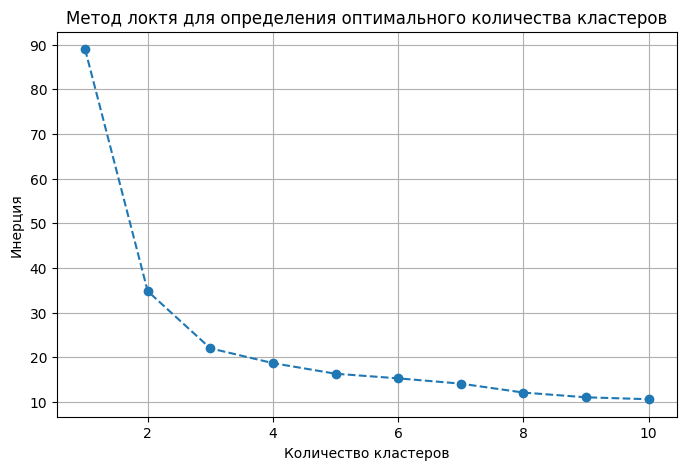

In [8]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя для определения оптимального количества кластеров')
plt.grid(True)
plt.show()

In [21]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_normalized)

print("Метки кластеров:")
print(cluster_labels)

Метки кластеров:
[2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 2 2 2 0 2 2 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1]


Визуализируйте результаты кластеризации, выбрав для визуализации два параметра из матрицы Х

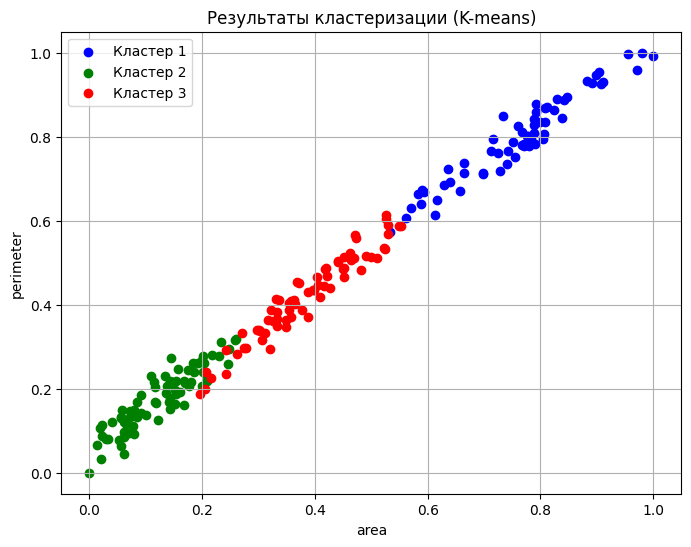

In [22]:
param1 = 'area'
param2 = 'perimeter'

plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red', 'purple', 'orange']

for cluster in range(optimal_k):
    cluster_points = X_normalized[cluster_labels == cluster]
    plt.scatter(cluster_points[:, X.columns.get_loc(param1)],
                cluster_points[:, X.columns.get_loc(param2)],
                color=colors[cluster], label=f'Кластер {cluster + 1}')

plt.xlabel(param1)
plt.ylabel(param2)
plt.title('Результаты кластеризации (K-means)')
plt.legend()
plt.grid(True)
plt.show()


Разделите данные на кластеры методом иерархической кластеризации, выберите с помощью дендрограммы оптимальное количество кластеров

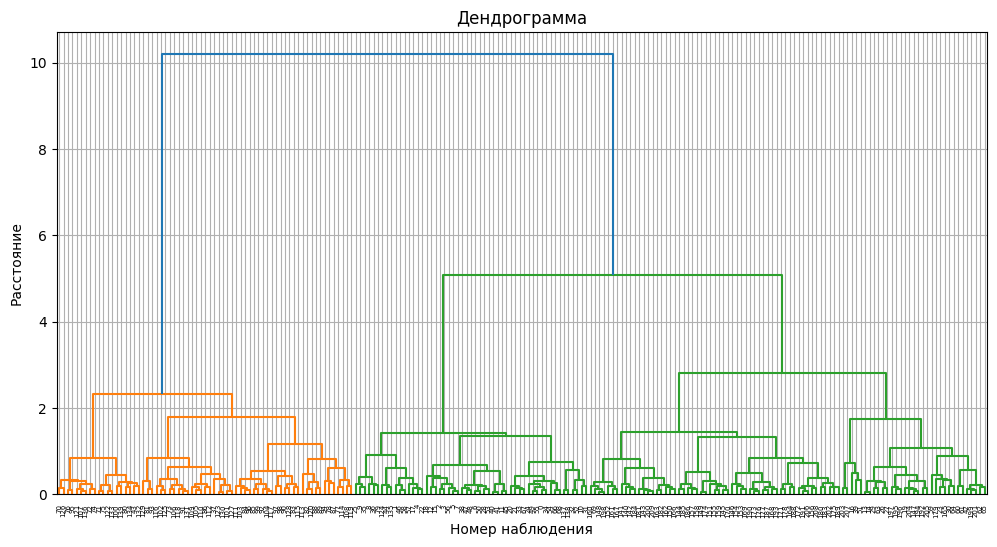

In [23]:
Z = linkage(X_normalized, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Дендрограмма')
plt.xlabel('Номер наблюдения')
plt.ylabel('Расстояние')
plt.grid(True)
plt.show()

Визуализируйте результаты кластеризации методом иерархической кластеризации.

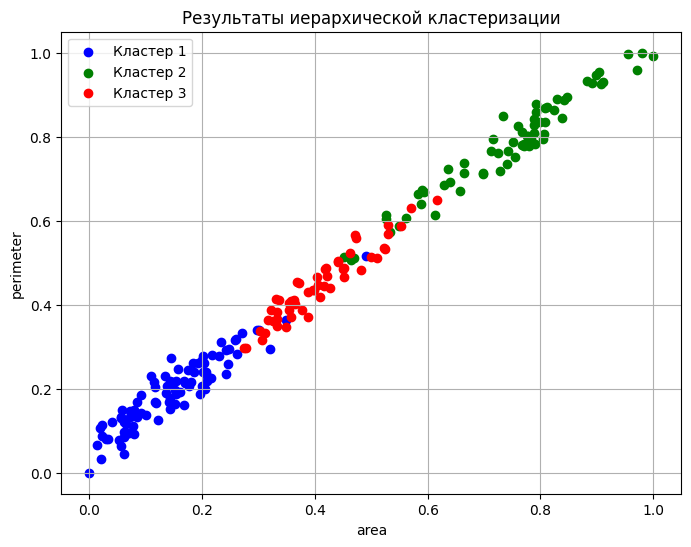

In [24]:
optimal_clusters = 3

agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)

cluster_labels_agg = agg_clustering.fit_predict(X_normalized)

plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red', 'purple', 'orange']

for cluster in range(optimal_clusters):
    cluster_points = X_normalized[cluster_labels_agg == cluster]
    plt.scatter(cluster_points[:, X.columns.get_loc(param1)],
                cluster_points[:, X.columns.get_loc(param2)],
                color=colors[cluster], label=f'Кластер {cluster + 1}')


plt.xlabel(param1)
plt.ylabel(param2)
plt.title('Результаты иерархической кластеризации')
plt.legend()
plt.grid(True)
plt.show()

Оцените качество кластеризации методами K-means и иерархической кластеризации, рассчитав пару метрик качества кластеризации.

In [26]:
kmeans_silhouette = silhouette_score(X_normalized, cluster_labels)
print("Силуэт для метода K-means:", kmeans_silhouette)

Силуэт для метода K-means: 0.4221267624201065


In [27]:
agg_silhouette = silhouette_score(X_normalized, cluster_labels_agg)
print("Силуэт для иерархической кластеризации:", agg_silhouette)

Силуэт для иерархической кластеризации: 0.38103690313150723


Из датасета выберите любой конкретный объект и визуализируйте этот объект в виде точки отличного цвета и размера на
графике кластеров.

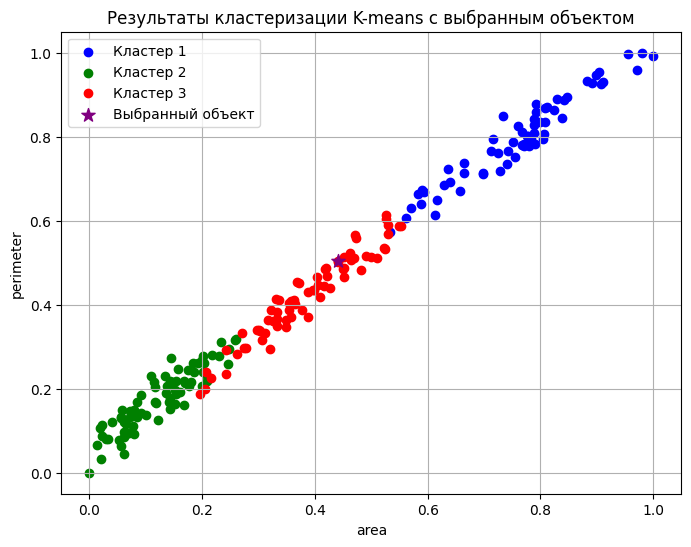

In [32]:
selected_object = X_normalized[10]

plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red', 'purple', 'orange']

for cluster in range(optimal_clusters):
    cluster_points = X_normalized[cluster_labels == cluster]
    plt.scatter(cluster_points[:, X.columns.get_loc(param1)],
                cluster_points[:, X.columns.get_loc(param2)],
                color=colors[cluster], label=f'Кластер {cluster + 1}')

plt.scatter(selected_object[X.columns.get_loc(param1)], selected_object[X.columns.get_loc(param2)],
            color='purple', label='Выбранный объект', s=100, marker='*')

plt.xlabel(param1)
plt.ylabel(param2)
plt.title('Результаты кластеризации K-means с выбранным объектом')
plt.legend()
plt.grid(True)
plt.show()